In [1]:
from ryDsp import *


In [6]:
sr, x= getWavFromYoutube()
x0, x1= x[:,0], x[:,1]

url= https://youtu.be/HBUwoAoScaQ, info= 手嶌 葵《テルーの唄 》中日字幕


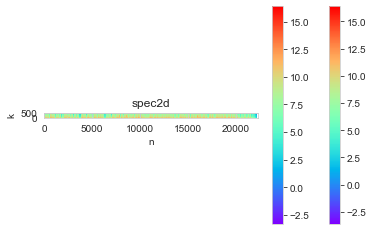

In [11]:
X0= makeSpectrogram(x0)
X1= makeSpectrogram(x1)

In [13]:
X0.shape

(22312, 513)

In [14]:
X1.shape

(22312, 513)

In [23]:
X= np.stack([X0,X1])
X.shape

(2, 22312, 513)

L:\OneDrive - 長庚大學\_ry_2021_fall_CguOneDrive\_ryDsp2021\ryDsp2021\ryDsp.py:621: RuntimeWarning: divide by zero encountered in log
  X= np.log(X)


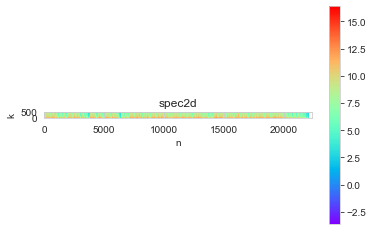

In [24]:
spec2d(X0)

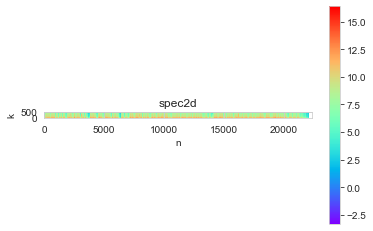

In [25]:
spec2d(X1)

# HomeWork: 
    
Based on my code (in ryDsp.py), 
please do some improvements.

For  
- makeSpectrogram() 

- genChirpSignal()


Please demo your code at next week course time.


In [26]:
#
# makeSpectrogram
#
def spec2d(X, log=True):
    
    X= X.T  # we like time-axis be horizontal axis
    
    if log==True:
        X= np.log(X)
    
    pl.imshow(X, origin='lower', cmap= 'rainbow')
    
    pl.colorbar()
    pl.xlabel('n')
    pl.ylabel('k')
    pl.title('spec2d')
    
def q_makeSpectrogram(ys, seg_length=1024):
    
    i, j= 0, seg_length
    step= seg_length // 2 # time-overlap
    
    spectrogram= [] 
    
    while j < len(ys):      
        segment= ys[i:j] 
        
        #spec= np.fft.fft(segment) 
        spec= np.fft.rfft(segment) 
        
        spectrogram += [spec]
        
        i += step
        j += step
        
    spectrogram= np.vstack(spectrogram)    
    spectrogram= np.abs(spectrogram)
    
    spec2d(spectrogram)
    
    return spectrogram

def q_genChirpSignal(
    T=  1,    # sec 
    f0=  440,
    f1=  880,
    style= 'linear', # ['linear','exponential','sinusoidal','square']
    A=  1,    # amplitude
    sr= 44100 # Hz, sampling rate, samples/sec
    ):
    
    # specify the time-series for the given duration
    ts= np.linspace(0, T, sr*T)
    
    #
    # specify the freq as fs= f(ts), 
    #
    # f() can be any function, 
    # boundary conditions 
    # f(t0)==f0
    # f(t1)==f1
    #
    
    def linear_style(ts):       
        fs= f0 + (f1-f0)/T * ts  # linear
        return fs
    
    def exponential_style(ts):       
        fs= f0 * (f1/f0)**(ts/T)  # exponential
        return fs
    
    def sinusoidal_style(ts):       
        fs= (f1-f0)*(1 + np.sin(2 * π * ts/T*3)) # sinusoid for 3 periods
        return fs
    
    def square_style(ts):       
        fs= f0 + (f1-f0)/T**2 * ts**2  # square
        return fs
    
    def sawtooth_style(ts):       
        frac, _= np.modf(ts)
        fs= frac*(f1-f0)+f0
        return fs
    
    def unknown_style(ts, T0=1):       
        fs= np.random.random(len(ts))*(f1-f0)+f0
        return fs
    
    
    if style in ['linear', 'lin', 'l']:   
        fs= linear_style(ts)
    elif style in ['exponential', 'exp', 'e']:   
        fs= exponential_style(ts)
    elif style in ['sinusoidal', 'sin', 's']: 
        fs= sinusoidal_style(ts)
    elif style in ['square', 'squ', 'sq']:   
        fs= square_style(ts)
    elif style in ['sawtooth', 'saw', 'sa']:   
        fs= sawtooth_style(ts)
    else:
        print('style unknown')
        fs= unknown_style(ts)
    
    # radian frequency
    ws= 2*π*fs
    
    #
    # θ = Integrate (w(t) dt)
    #
    dt=  T/len(ts)
    θ=   np.cumsum(ws)*dt  # this is mimic the integration 
    
    #
    # finally, generate the signal
    #
    ys= A * np.sin(θ)
    
    return sr, ys


sr, x= genChirpSignal()
X=     makeSpectrogram(x)